In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
import scipy.stats

In [3]:
df = pd.read_csv('tips (data for regression problem).csv')
df.head(10)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


In [4]:
missing_values = df.isnull().sum()
print(missing_values)

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64


In [5]:
# One-hot encode categorical variables
df_encoded = pd.get_dummies(df, columns=['sex', 'smoker', 'day', 'time'], drop_first=True)

# Display the encoded DataFrame
df_encoded.head()


,total_bill,tip,size,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch
0,16.99,1.01,2,False,False,False,True,False,False
1,10.34,1.66,3,True,False,False,True,False,False
2,21.01,3.50,3,True,False,False,True,False,False
3,23.68,3.31,2,True,False,False,True,False,False
4,24.59,3.61,4,False,False,False,True,False,False


In [6]:
df_encoded


,total_bill,tip,size,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch
0,16.99,1.01,2,False,False,False,True,False,False
1,10.34,1.66,3,True,False,False,True,False,False
2,21.01,3.50,3,True,False,False,True,False,False
3,23.68,3.31,2,True,False,False,True,False,False
4,24.59,3.61,4,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,3,True,False,True,False,False,False
240,27.18,2.00,2,False,True,True,False,False,False
241,22.67,2.00,2,True,True,True,False,False,False
242,17.82,1.75,2,True,False,True,False,False,False


In [7]:
import seaborn as sns
import statsmodels.api as sm

# Display basic statistical overview
print("Dataset Summary:")
print(df.describe())


Dataset Summary:
       total_bill         tip        size
count  244.000000  244.000000  244.000000
mean    19.785943    2.998279    2.569672
std      8.902412    1.383638    0.951100
min      3.070000    1.000000    1.000000
25%     13.347500    2.000000    2.000000
50%     17.795000    2.900000    2.000000
75%     24.127500    3.562500    3.000000
max     50.810000   10.000000    6.000000


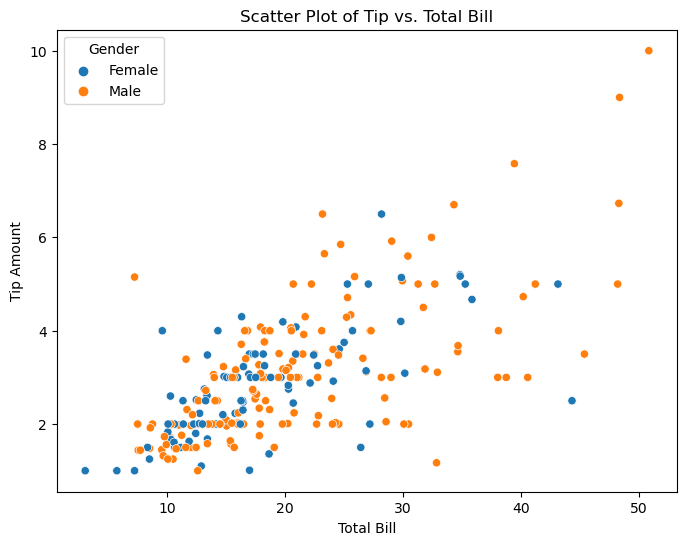

In [8]:
# 1. Scatter Plot: Tip vs. Total Bill
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='total_bill', y='tip', hue='sex')
plt.title("Scatter Plot of Tip vs. Total Bill")
plt.xlabel("Total Bill")
plt.ylabel("Tip Amount")
plt.legend(title="Gender")
plt.show()

There appears to be a positive correlation between the tip amount and the total bill.

D:\Coding\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


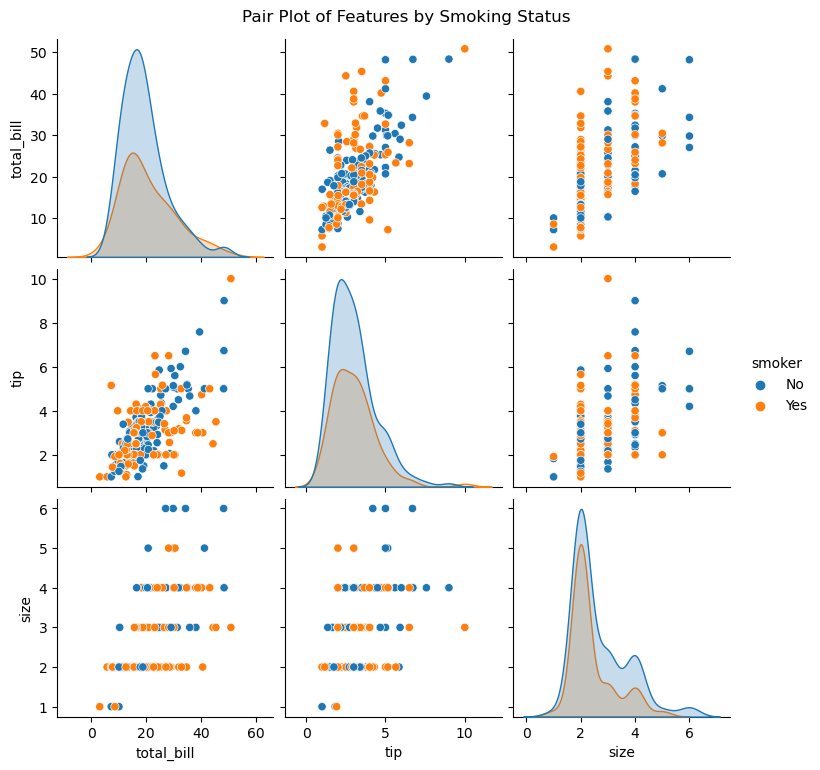

In [9]:
# 2. Pair Plot for Multiple Features
sns.pairplot(df, hue='smoker')
plt.suptitle("Pair Plot of Features by Smoking Status", y=1.02)
plt.show()

There doesn't seem to be much difference between smokers and non-smokers for the variables such as tip and total bill.

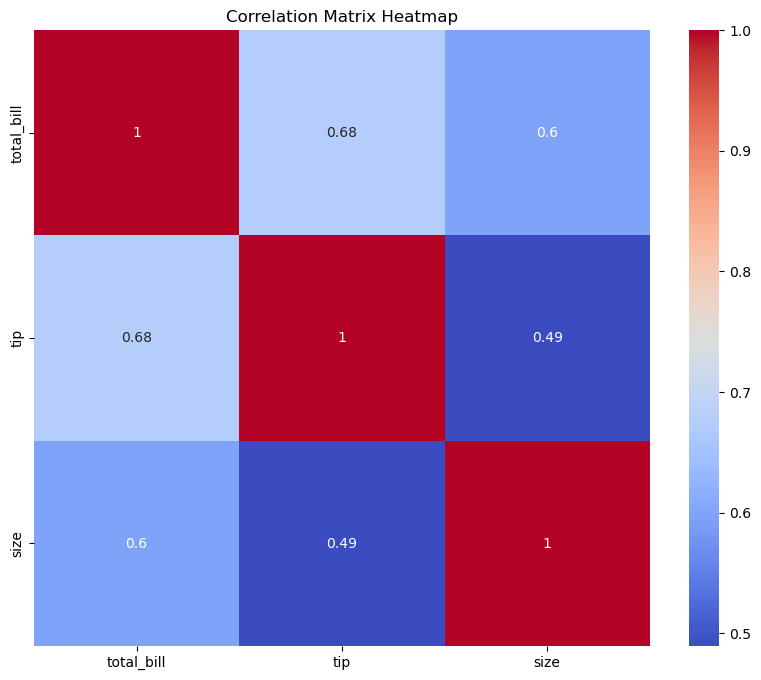

In [10]:
# Drop non-numeric columns before calculating the correlation matrix
numeric_data = df.select_dtypes(include=['number'])

# 3. Correlation Matrix and Heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title("Correlation Matrix Heatmap")
plt.show()

From the heatmap we can see that there is a strong positive correlation between total_bill and tip confirming the general observation that people tend to tip a larger percentage on larger bills. Also larger groups tend to have higher total bills, which is likely due to more individuals contributing to the bill. The moderate correlation with tips suggests that larger groups might tip a bit more, but this is not a strong trend.

In [11]:
# 4. Rainbow Test for Linearity
from statsmodels.stats.diagnostic import linear_rainbow
# Define the target and feature variables for linearity test
X = df[['total_bill', 'size']]
y = df['tip']

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Fit the Ordinary Least Squares (OLS) model
model = sm.OLS(y, X).fit()

# Perform Rainbow Test
rainbow_stat, rainbow_p_value = linear_rainbow(model)
print(f"Rainbow Test Statistic: {rainbow_stat}, p-value: {rainbow_p_value}")
if rainbow_p_value > 0.05:
    print("The relationship appears to be linear.")
else:
    print("The relationship may not be linear.")

Rainbow Test Statistic: 1.190265664683282, p-value: 0.1704893569344739
The relationship appears to be linear.


In [12]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Function to evaluate model performance
def evaluate_model(y_test, y_pred):
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Root Mean Squared Error (RMSE): {rmse}")
    print(f"R² Score: {r2}")


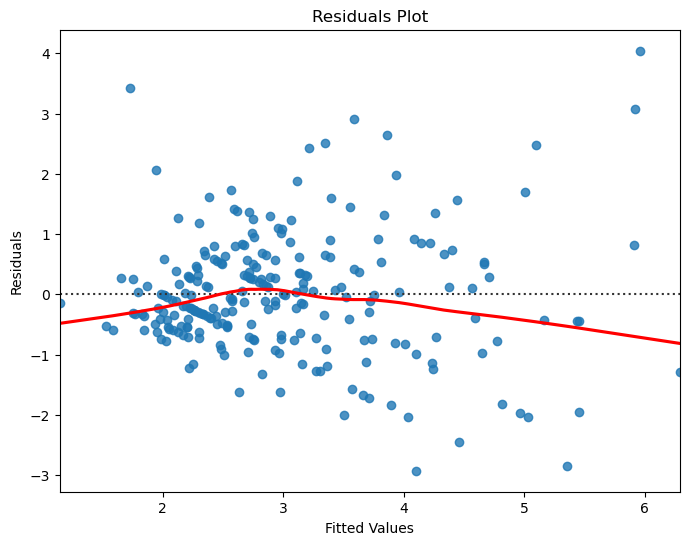

In [13]:
# 5. Residuals Plot
plt.figure(figsize=(8, 6))
residuals = model.resid
sns.residplot(x=model.fittedvalues, y=residuals, lowess=True, line_kws={'color': 'red'})
plt.title("Residuals Plot")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.show()

The non-linear pattern in the residuals suggests that the linear model might not be the best fit for the data we should consider using polynomial regression or other non-linear models to capture the underlying relationship.

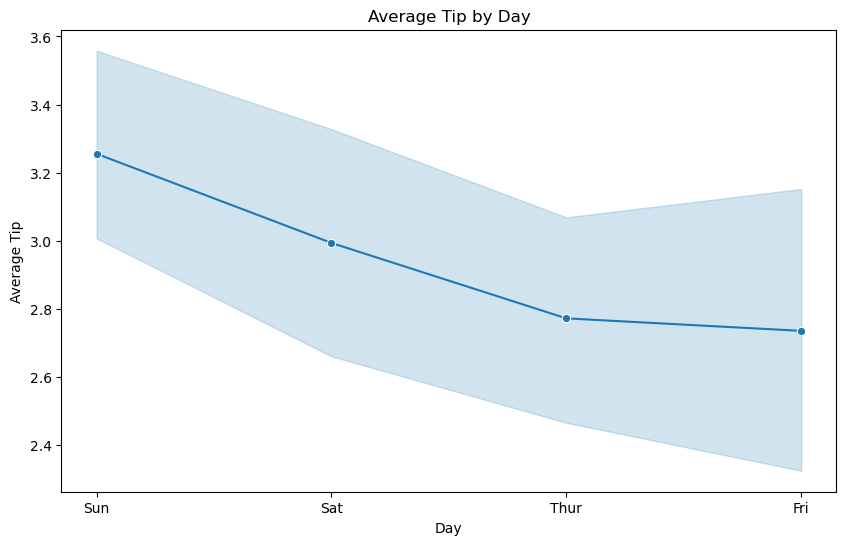

In [14]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x="day", y="tip", estimator="mean", marker="o")
plt.title("Average Tip by Day")
plt.xlabel("Day")
plt.ylabel("Average Tip")
plt.show()

In [15]:
from sklearn.model_selection import train_test_split

# Load the dataset (assumed to be already encoded with pd.get_dummies if necessary)
# Replace 'data_encoded' with your encoded DataFrame variable name
X = df_encoded.drop('tip', axis=1)  # Features
y = df_encoded['tip']               # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [16]:
from sklearn.linear_model import LinearRegression

# Initialize and train the model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_linear = linear_model.predict(X_test)
print("Linear Regression Performance:")
evaluate_model(y_test, y_pred_linear)


Linear Regression Performance:
Mean Absolute Error (MAE): 0.6671331480264895
Mean Squared Error (MSE): 0.7033566017436106
Root Mean Squared Error (RMSE): 0.8386635807900631
R² Score: 0.43730181943482493


Linear Regression performs reasonably well with an R² of 0.4373, indicating that the model explains 43.73% of the variance in the target variable.
The MAE (0.6671) and RMSE (0.8387) indicate moderate errors, but the R² score suggests there is room for improvement.

In [17]:
# For Linear Regression model
coefficients = linear_model.coef_
feature_df = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': coefficients})
feature_df = feature_df.sort_values(by='Coefficient', ascending=False)
print(feature_df)

      Feature  Coefficient
1        size     0.233484
7  time_Lunch     0.094957
0  total_bill     0.094700
2    sex_Male     0.028819
5     day_Sun    -0.050793
6    day_Thur    -0.179721
4     day_Sat    -0.185785
3  smoker_Yes    -0.192353


In [18]:
from sklearn.linear_model import Ridge

# Initialize and train the model with regularization
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_ridge = ridge_model.predict(X_test)
print("Ridge Regression Performance:")
evaluate_model(y_test, y_pred_ridge)


Ridge Regression Performance:
Mean Absolute Error (MAE): 0.6665379965588626
Mean Squared Error (MSE): 0.7007477213216071
Root Mean Squared Error (RMSE): 0.8371067562274284
R² Score: 0.43938897161784884


Ridge regression's performance is quite similar to Linear Regression, with very small differences in MAE, MSE, RMSE, and R². This suggests that regularization in Ridge might not have made a significant difference in this case.
The model has a slightly higher R² (0.4394), which is marginally better than Linear Regression

In [19]:
from sklearn.linear_model import Lasso

# Initialize and train the model with regularization
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_lasso = lasso_model.predict(X_test)
print("Lasso Regression Performance:")
evaluate_model(y_test, y_pred_lasso)


Lasso Regression Performance:
Mean Absolute Error (MAE): 0.6374841046500828
Mean Squared Error (MSE): 0.5908528649971526
Root Mean Squared Error (RMSE): 0.7686695421292251
R² Score: 0.5273068720881754


Lasso Regression performs the best among all models, with the lowest MAE (0.6375) and RMSE (0.7687). The R² score (0.5273) indicates that Lasso is able to explain over 52% of the variance in the target variable, which is a significant improvement over Linear and Ridge Regression.
The Lasso model likely benefited from feature selection due to its regularization nature, leading to better performance.

In [20]:
from sklearn.tree import DecisionTreeRegressor

# Initialize and train the model
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_tree = tree_model.predict(X_test)
print("Decision Tree Regression Performance:")
evaluate_model(y_test, y_pred_tree)


Decision Tree Regression Performance:
Mean Absolute Error (MAE): 0.8295918367346939
Mean Squared Error (MSE): 1.2551938775510205
Root Mean Squared Error (RMSE): 1.120354353564541
R² Score: -0.004178121600921791


Decision Tree performed poorly with a negative R² score of -0.0042, which indicates that the model performs worse than simply predicting the mean value of the target variable.
The high MAE (0.8296) and RMSE (1.1204) show significant errors in prediction, suggesting that the model might be overfitting the training data or requires more tuning (e.g., pruning, max depth adjustments).

In [21]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the model
forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
forest_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_forest = forest_model.predict(X_test)
print("Random Forest Regression Performance:")
evaluate_model(y_test, y_pred_forest)


Random Forest Regression Performance:
Mean Absolute Error (MAE): 0.7557163265306125
Mean Squared Error (MSE): 0.9196720148979602
Root Mean Squared Error (RMSE): 0.9589953153680993
R² Score: 0.2642455218065466


Random Forest performs better than Decision Tree, but its R² score (0.2642) is still relatively low, meaning it explains about 26% of the variance.
The MAE (0.7557) and RMSE (0.9590) indicate moderate error, and Random Forest seems to underperform relative to Lasso Regression and Linear Regression

In [22]:
# For Random Forest Model
importances = forest_model.feature_importances_
feature_names = X_train.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)

      Feature  Importance
0  total_bill    0.767043
3  smoker_Yes    0.069417
1        size    0.058045
4     day_Sat    0.030292
5     day_Sun    0.025223
2    sex_Male    0.025187
7  time_Lunch    0.012975
6    day_Thur    0.011818


In [23]:
from sklearn.svm import SVR

# Initialize and train the model
svr_model = SVR(kernel='rbf', C=1.0, epsilon=0.1)
svr_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_svr = svr_model.predict(X_test)
print("Support Vector Regression Performance:")
evaluate_model(y_test, y_pred_svr)


Support Vector Regression Performance:
Mean Absolute Error (MAE): 0.5679864502285389
Mean Squared Error (MSE): 0.5323763062616395
Root Mean Squared Error (RMSE): 0.7296412174909251
R² Score: 0.5740891915042663


SVR performs quite well with the lowest MAE (0.5680) and RMSE (0.7296), along with the highest R² score (0.5741). It performs slightly better than Lasso Regression in terms of error metrics, and the R² score suggests SVR explains over 57% of the variance in the target variable.
This suggests that SVR is a strong model for this task.

In [24]:
from sklearn.neighbors import KNeighborsRegressor

# Initialize and train the model
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_knn = knn_model.predict(X_test)
print("K-Nearest Neighbors Regression Performance:")
evaluate_model(y_test, y_pred_knn)


K-Nearest Neighbors Regression Performance:
Mean Absolute Error (MAE): 0.718857142857143
Mean Squared Error (MSE): 0.8763725714285714
Root Mean Squared Error (RMSE): 0.9361477294896203
R² Score: 0.29888587066985495


KNN performs better than Decision Tree and Random Forest, but its R² score (0.2989) suggests that it explains only about 30% of the variance. The MAE (0.7189) and RMSE (0.9361) indicate moderate errors, and KNN doesn't outperform models like SVR or Lasso Regression

# Overall Analysis and Model Comparison

Best Performing Model:

SVR stands out as the best model overall, with the lowest MAE (0.5680), RMSE (0.7296), and the highest R² (0.5741). It is the most accurate in predicting the tip amounts.
Lasso Regression is also a strong performer, with an R² of 0.5273, and lower error metrics compared to other models (except for SVR).

Weakest Model:

Decision Tree Regression is the weakest model, with an R² close to 0 and negative, indicating poor predictive power.

# Conclusions

Tables with a higher number of guests should be prioritized, as larger groups tend to tip more generously

To maximize revenue, the business should focus on increasing the average total bill per table, as there is a strong correlation between the total bill and the tip amount.

To increase tip rates, the business should focus on providing top-notch service on Sundays and improve service quality on Fridays.

